# Entrenamiento de red Feedforward 

Con el dataset creado anteriormente con 1000 características y una columna para clase, vamos a entrenar la red FF con múltiples corridas guardando cada una

In [1]:
#Llamamos las librerías
import numpy as np
import pandas as pd
!pip install tensorflow-gpu
import tensorflow as tf
from tensorflow import keras

In [2]:
#Llamamos el dataset a un dataframe de pandas
dataset = pd.read_csv("../Datasets/DataSet_Tipo.csv")
#Ahora lo dividimos en salida y entrada, la salida es la última columna
#0 indica NO VEHICULO
#1 indica VEHICULO
Y = dataset[dataset.columns[-1]]
X = dataset[dataset.columns[:-1]]
#Separamos en Test y Train con ayuda de sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from numba import cuda
from tensorflow.keras.models import load_model

In [4]:
#Acá se entrenará y codificará la arquitectura 4 para la red de Tipo
#100 épocas con un batch_size 20
#100 corridas por cada arquitectura
#Learning rate de 0.001
#Optimizador, Descenso de gradiente estocástico
history = []
best_val_history = []
for i in range(1,101):
    modelo = Sequential()
    modelo.add(Dense(750,input_shape=(1500,),activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))   
    modelo.add(Dense(370,activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))   
    modelo.add(Dense(185,activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))   
    modelo.add(Dense(93,activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))   
    modelo.add(Dense(8,activation='softmax',kernel_initializer='random_normal',bias_initializer='zeros'))
    mcp_save = ModelCheckpoint('Tipo/Arquitectura4_LR_0_001/arq4_'+str(i)+'.hdf5', save_best_only=True, monitor='val_loss', mode='min',save_weights_only=False)
    modelo.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001), loss='sparse_categorical_crossentropy',metrics=['acc'])
    history.append(modelo.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100, batch_size=20,callbacks=[mcp_save]))
    del modelo
    
    

Epoch 1/100
614/614 [==============================] - 1s 2ms/step - loss: 1.8344 - acc: 0.3631 - val_loss: 1.7651 - val_acc: 0.3876
Epoch 2/100
614/614 [==============================] - 1s 2ms/step - loss: 1.7575 - acc: 0.3861 - val_loss: 1.7519 - val_acc: 0.3874
Epoch 3/100
614/614 [==============================] - 1s 2ms/step - loss: 1.7457 - acc: 0.3861 - val_loss: 1.7443 - val_acc: 0.3872
Epoch 4/100
614/614 [==============================] - 1s 2ms/step - loss: 1.7360 - acc: 0.3860 - val_loss: 1.7389 - val_acc: 0.3876
Epoch 5/100
614/614 [==============================] - 1s 2ms/step - loss: 1.7267 - acc: 0.3863 - val_loss: 1.7326 - val_acc: 0.3876
Epoch 6/100
614/614 [==============================] - 1s 2ms/step - loss: 1.7168 - acc: 0.3870 - val_loss: 1.7261 - val_acc: 0.3880
Epoch 7/100
614/614 [==============================] - 1s 2ms/step - loss: 1.7063 - acc: 0.3893 - val_loss: 1.7189 - val_acc: 0.3907
Epoch 8/100
614/614 [==============================] - 1s 2ms/step - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



614/614 [==============================] - 1s 1ms/step - loss: 1.2665 - acc: 0.5542 - val_loss: 1.6460 - val_acc: 0.4218
Epoch 32/100
614/614 [==============================] - 1s 1ms/step - loss: 1.2419 - acc: 0.5625 - val_loss: 1.6730 - val_acc: 0.4269
Epoch 33/100
614/614 [==============================] - 1s 1ms/step - loss: 1.2160 - acc: 0.5722 - val_loss: 1.6667 - val_acc: 0.4220
Epoch 34/100
614/614 [==============================] - 1s 1ms/step - loss: 1.1897 - acc: 0.5840 - val_loss: 1.6785 - val_acc: 0.4180
Epoch 35/100
614/614 [==============================] - 1s 1ms/step - loss: 1.1612 - acc: 0.5964 - val_loss: 1.7002 - val_acc: 0.4218
Epoch 36/100
614/614 [==============================] - 1s 1ms/step - loss: 1.1329 - acc: 0.6068 - val_loss: 1.7146 - val_acc: 0.4076
Epoch 37/100
614/614 [==============================] - 1s 1ms/step - loss: 1.1022 - acc: 0.6214 - val_loss: 1.7333 - val_acc: 0.4192
Epoch 38/100
614/614 [==============================] - 1s 1ms/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



614/614 [==============================] - 1s 1ms/step - loss: 0.1521 - acc: 0.9742 - val_loss: 3.7509 - val_acc: 0.3534
Epoch 66/100
614/614 [==============================] - 1s 1ms/step - loss: 0.1399 - acc: 0.9772 - val_loss: 3.8339 - val_acc: 0.3466
Epoch 67/100
614/614 [==============================] - 1s 1ms/step - loss: 0.1289 - acc: 0.9800 - val_loss: 3.9137 - val_acc: 0.3468
Epoch 68/100
614/614 [==============================] - 1s 1ms/step - loss: 0.1187 - acc: 0.9820 - val_loss: 4.0016 - val_acc: 0.3517
Epoch 69/100
614/614 [==============================] - 1s 1ms/step - loss: 0.1095 - acc: 0.9833 - val_loss: 4.0711 - val_acc: 0.3475
Epoch 70/100
614/614 [==============================] - 1s 2ms/step - loss: 0.1009 - acc: 0.9859 - val_loss: 4.1506 - val_acc: 0.3513
Epoch 71/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0932 - acc: 0.9872 - val_loss: 4.2171 - val_acc: 0.3492
Epoch 72/100
614/614 [==============================] - 1s 1ms/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



614/614 [==============================] - 1s 2ms/step - loss: 1.3595 - acc: 0.5141 - val_loss: 1.6155 - val_acc: 0.4207
Epoch 27/100
614/614 [==============================] - 1s 2ms/step - loss: 1.3358 - acc: 0.5218 - val_loss: 1.6207 - val_acc: 0.4163
Epoch 28/100
614/614 [==============================] - 1s 2ms/step - loss: 1.3122 - acc: 0.5328 - val_loss: 1.6452 - val_acc: 0.4228
Epoch 29/100
614/614 [==============================] - 1s 2ms/step - loss: 1.2876 - acc: 0.5437 - val_loss: 1.6373 - val_acc: 0.4173
Epoch 30/100
614/614 [==============================] - 1s 2ms/step - loss: 1.2620 - acc: 0.5543 - val_loss: 1.6427 - val_acc: 0.4138
Epoch 31/100
614/614 [==============================] - 1s 2ms/step - loss: 1.2357 - acc: 0.5656 - val_loss: 1.6533 - val_acc: 0.4155
Epoch 32/100
614/614 [==============================] - 1s 2ms/step - loss: 1.2086 - acc: 0.5763 - val_loss: 1.6692 - val_acc: 0.4148
Epoch 33/100
614/614 [==============================] - 1s 2ms/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



614/614 [==============================] - 1s 2ms/step - loss: 0.5506 - acc: 0.8366 - val_loss: 2.3765 - val_acc: 0.3766
Epoch 52/100
614/614 [==============================] - 1s 2ms/step - loss: 0.5104 - acc: 0.8512 - val_loss: 2.4521 - val_acc: 0.3737
Epoch 53/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4726 - acc: 0.8661 - val_loss: 2.5424 - val_acc: 0.3762
Epoch 54/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4362 - acc: 0.8782 - val_loss: 2.6335 - val_acc: 0.3775
Epoch 55/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4024 - acc: 0.8908 - val_loss: 2.7244 - val_acc: 0.3734
Epoch 56/100
614/614 [==============================] - 1s 2ms/step - loss: 0.3703 - acc: 0.9043 - val_loss: 2.8186 - val_acc: 0.3743
Epoch 57/100
614/614 [==============================] - 1s 2ms/step - loss: 0.3400 - acc: 0.9158 - val_loss: 2.9156 - val_acc: 0.3629
Epoch 58/100
614/614 [==============================] - 1s 2ms/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



614/614 [==============================] - 1s 2ms/step - loss: 0.0961 - acc: 0.9872 - val_loss: 4.3775 - val_acc: 0.3314
Epoch 72/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0884 - acc: 0.9890 - val_loss: 4.4628 - val_acc: 0.3338
Epoch 73/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0815 - acc: 0.9900 - val_loss: 4.5424 - val_acc: 0.3314
Epoch 74/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0752 - acc: 0.9914 - val_loss: 4.6278 - val_acc: 0.3317
Epoch 75/100
614/614 [==============================] - 2s 2ms/step - loss: 0.0696 - acc: 0.9929 - val_loss: 4.7088 - val_acc: 0.3283
Epoch 76/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0645 - acc: 0.9938 - val_loss: 4.7705 - val_acc: 0.3310
Epoch 77/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0597 - acc: 0.9947 - val_loss: 4.8539 - val_acc: 0.3289
Epoch 78/100
614/614 [==============================] - 1s 2ms/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



614/614 [==============================] - 1s 2ms/step - loss: 0.0313 - acc: 0.9982 - val_loss: 5.1224 - val_acc: 0.3411
Epoch 89/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0297 - acc: 0.9984 - val_loss: 5.1656 - val_acc: 0.3409
Epoch 90/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0281 - acc: 0.9985 - val_loss: 5.2148 - val_acc: 0.3395
Epoch 91/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0267 - acc: 0.9988 - val_loss: 5.2618 - val_acc: 0.3376
Epoch 92/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0253 - acc: 0.9990 - val_loss: 5.2996 - val_acc: 0.3375
Epoch 93/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0241 - acc: 0.9991 - val_loss: 5.3432 - val_acc: 0.3394
Epoch 94/100
614/614 [==============================] - 1s 2ms/step - loss: 0.0229 - acc: 0.9993 - val_loss: 5.3844 - val_acc: 0.3375
Epoch 95/100
614/614 [==============================] - 1s 1ms/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



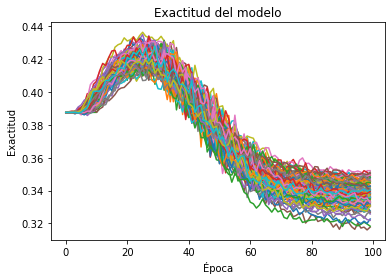

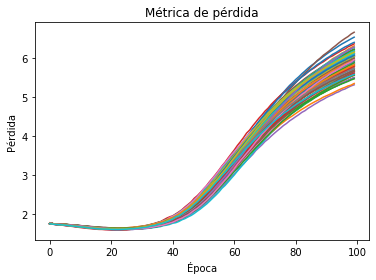

In [5]:
from matplotlib import pyplot as plt
for i in range(len(history)):
  plt.plot(history[i].history['val_acc'])
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.show()
# "Loss"
for i in range(len(history)):
  plt.plot(history[i].history['val_loss'])
plt.title('Métrica de pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.show()

In [6]:
best_val_history = []
for i in range(1,101):
    modelo = load_model('Tipo/Arquitectura4_LR_0_001/arq4_'+str(i)+'.hdf5')
    best_val_history.append(modelo.evaluate(x=X_test, y=Y_test))
    del modelo

165/165 [==============================] - 0s 942us/step - loss: 1.6114 - acc: 0.6211


In [7]:
prom_loss = 0.0;
prom_acc = 0.0;
for i in range(len(best_val_history)):
    prom_loss = prom_loss + best_val_history[i][0]
    prom_acc = prom_acc + best_val_history[i][1]

prom_loss = prom_loss / len(best_val_history)
prom_acc = prom_acc / len(best_val_history)

print(prom_loss)
print(prom_acc)

1.6222857928276062
0.6236747086048127


In [8]:
#Para liberar la memoria del GPU
cuda.select_device(0)
cuda.close()